<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T2_3_Data_Cleaning_Agrupación_de_datos_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17387, done.
remote: Total 17387 (delta 0), reused 0 (delta 0), pack-reused 17387
Receiving objects: 100% (17387/17387), 512.33 MiB | 27.58 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (16900/16900), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [2]:
!ls '/content/drive/My Drive' 

ls: cannot access '/content/drive/My Drive': No such file or directory


# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Python3.8

# Colab no permite actualizar la version de python, asi que utilizamos miniconda

### Tener paciencia y esperar 1 minuto

In [3]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh > /dev/null 2>&1
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local > /dev/null 2>&1
!conda install -q -y --prefix /usr/local jupyter > /dev/null 2>&1
!python -m ipykernel install --name "py38" --user > /dev/null 2>&1

### La celda de abajo, ejecutar cada vez que reinicies el kernel.

In [4]:
import sys
#si usamos append nos coge la libreria de python3.6, ya que el so lee de forma secuencial la lista de librerias
_ = (sys.path.insert(0,"/usr/local/lib/python3.8/site-packages")) #folder librerias python
sys.path

['/usr/local/lib/python3.8/site-packages',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [129]:
!conda install numpy scipy==1.4.1 sklearn matplotlib pandas --yes > /dev/null 2>&1
!conda install -c conda-forge statsmodels  --yes > /dev/null 2>&1
#!conda install --channel conda-forge featuretools --yes > /dev/null 2>&1
!conda install -c conda-forge statsmodels

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.



In [130]:
!python3 --version

Python 3.8.3


In [65]:
import scipy
print(scipy.__version__)

1.4.1


# Agregación de datos por categoría

In [131]:
import numpy as np
import pandas as pd

In [132]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [133]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [134]:
gender_data[1:10]

['Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female']

In [135]:
income_data[1:10]

['Poor',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor']

In [136]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [137]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [138]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,166.804007,59.112901,37.322058,18479.703295
1,Female,Poor,155.776681,80.348638,48.058395,19540.217722
2,Male,Rich,135.687605,40.163796,19.084108,20085.354380
3,Female,Poor,186.693759,59.443447,30.124853,19071.254341
4,Male,Rich,155.881569,98.230917,34.037907,19062.009257


## Agrupación de datos

In [139]:
grouped_gender = data.groupby("Gender")

In [140]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   3,   7,   9,  11,  12,  13,  15,  16,
             ...
             480, 482, 484, 485, 486, 488, 490, 492, 496, 497],
            dtype='int64', length=266),
 'Male': Int64Index([  2,   4,   5,   6,   8,  10,  14,  17,  20,  21,
             ...
             481, 483, 487, 489, 491, 493, 494, 495, 498, 499],
            dtype='int64', length=234)}

In [141]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Poor  166.804007  59.112901  37.322058  18479.703295
1    Female            Poor  155.776681  80.348638  48.058395  19540.217722
3    Female            Poor  186.693759  59.443447  30.124853  19071.254341
7    Female            Rich  171.331760  52.748110  41.595709  18869.794537
9    Female            Poor  204.735808  53.297567  31.837990  19708.750156
..      ...             ...         ...        ...        ...           ...
488  Female            Rich  116.433729  67.786665  13.431846  19301.252637
490  Female            Poor  216.337448  60.930051   7.708013  20342.374711
492  Female    Middle Class  135.617267  53.615845  57.641346  19790.519611
496  Female            Poor   89.407098  58.660913  36.363020  18898.518293
497  Female            Rich  191.195269  50.343440  38.098379  21155.929414

[266 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [142]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,166.804007,59.112901,37.322058,18479.703295
1,Female,Poor,155.776681,80.348638,48.058395,19540.217722
3,Female,Poor,186.693759,59.443447,30.124853,19071.254341
7,Female,Rich,171.331760,52.748110,41.595709,18869.794537
9,Female,Poor,204.735808,53.297567,31.837990,19708.750156
...,...,...,...,...,...,...
488,Female,Rich,116.433729,67.786665,13.431846,19301.252637
490,Female,Poor,216.337448,60.930051,7.708013,20342.374711
492,Female,Middle Class,135.617267,53.615845,57.641346,19790.519611
496,Female,Poor,89.407098,58.660913,36.363020,18898.518293


In [143]:
double_group = data.groupby(["Gender", "Economic Status"])

In [144]:
len(double_group)

6

In [145]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
30   Female    Middle Class  148.732551  87.428975  32.774006  21242.814003
31   Female    Middle Class  144.749048  49.634700  28.973936  19872.120376
32   Female    Middle Class  200.139184  90.654814  35.238706  18445.773081
40   Female    Middle Class  190.019439  49.763757  29.144677  19348.035707
50   Female    Middle Class  142.590001  78.038883  14.351897  19831.939024
..      ...             ...         ...        ...        ...           ...
469  Female    Middle Class  109.096617  98.867796  15.887681  19876.821257
472  Female    Middle Class  224.883553  64.262493  21.139166  20524.571692
485  Female    Middle Class  151.474128  21.408544  34.157740  20431.203299
486  Female    Middle Class  124.881212  72.683705  41.582406  20302.598628
492  Female    Middle Class  135.617267  53.615845  57.641346  19790.519611

[93 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [146]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15445.033146  6090.859865  2914.645996  1.821841e+06
       Poor             14672.886551  6009.086135  2763.857017  1.813293e+06
       Rich             13487.384371  5501.042484  2488.246398  1.606382e+06
Male   Middle Class     12006.697222  5632.750714  2291.707989  1.519572e+06
       Poor             13188.111408  5395.755418  2128.134812  1.588092e+06
       Rich             12077.574465  4811.041868  2355.411607  1.498431e+06

In [147]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     166.075625  65.493117  31.340280  19589.686564
       Poor             159.487897  65.316154  30.041924  19709.704159
       Rich             166.510918  67.914105  30.719091  19831.876029
Male   Middle Class     155.931133  73.152607  29.762441  19734.699970
       Poor             162.816190  66.614264  26.273269  19606.079970
       Rich             158.915453  63.303182  30.992258  19716.195519

In [148]:
double_group.size()

Gender  Economic Status
Female  Middle Class       93
        Poor               92
        Rich               81
Male    Middle Class       77
        Poor               81
        Rich               76
dtype: int64

In [149]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      93.0  166.075625  ...  20431.203299  21440.373929
       Poor              92.0  159.487897  ...  20527.278809  21474.354947
       Rich              81.0  166.510918  ...  20578.158547  21348.463256
Male   Middle Class      77.0  155.931133  ...  20498.322198  21491.973300
       Poor              81.0  162.816190  ...  20266.588764  21425.444754
       Rich              76.0  158.915453  ...  20460.425706  21495.560394

[6 rows x 32 columns]

In [150]:
grouped_income = double_group["Income"]

In [151]:
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      93.0  19589.686564  ...  20431.203299  21440.373929
       Poor              92.0  19709.704159  ...  20527.278809  21474.354947
       Rich              81.0  19831.876029  ...  20578.158547  21348.463256
Male   Middle Class      77.0  19734.699970  ...  20498.322198  21491.973300
       Poor              81.0  19606.079970  ...  20266.588764  21425.444754
       Rich              76.0  19716.195519  ...  20460.425706  21495.560394

[6 rows x 8 columns]

In [152]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.821841e+06  31.340280  32.131700
       Poor             1.813293e+06  30.041924  30.181836
       Rich             1.606382e+06  30.719091  28.268298
Male   Middle Class     1.519572e+06  29.762441  31.126932
       Poor             1.588092e+06  26.273269  31.649602
       Rich             1.498431e+06  30.992258  32.448592

In [153]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     31.340280  5.196605
       Poor             30.041924  5.313189
       Rich             30.719091  5.927077
Male   Middle Class     29.762441  5.042374
       Poor             26.273269  5.176388
       Rich             30.992258  4.929995

In [154]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     15445.033146  166.075625  ...  19589.686564  1016.064014
       Poor             14672.886551  159.487897  ...  19709.704159  1023.698002
       Rich             13487.384371  166.510918  ...  19831.876029   913.622778
Male   Middle Class     12006.697222  155.931133  ...  19734.699970  1011.324349
       Poor             13188.111408  162.816190  ...  19606.079970  1017.314653
       Rich             12077.574465  158.915453  ...  19716.195519   995.005343

[6 rows x 12 columns]

In [155]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.196605  2.828429  2.387723  19.384472
       Poor             5.313189  2.871732  2.344919  19.358935
       Rich             5.927077  3.022038  2.431026  21.842100
Male   Middle Class     5.042374  2.859104  2.723617  19.641680
       Poor             5.176388  3.086070  1.871320  19.392464
       Rich             4.929995  2.312194  2.370863  19.946829

## Filtrado de datos

In [156]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      37.322058
1      48.058395
3      30.124853
7      41.595709
9      31.837990
         ...    
488    13.431846
490     7.708013
492    57.641346
496    36.363020
497    38.098379
Name: Age, Length: 266, dtype: float64

## Transformación de variables

In [157]:
zscore = lambda x : (x - x.mean())/x.std()

In [158]:
z_group = double_group.transform(zscore)

In [159]:
import matplotlib.pyplot as plt

(array([  4.,  15.,  29.,  72.,  99., 111.,  94.,  51.,  17.,   8.]),
 array([-3.00539939, -2.43250191, -1.85960443, -1.28670695, -0.71380946,
        -0.14091198,  0.4319855 ,  1.00488298,  1.57778046,  2.15067795,
         2.72357543]),
 <a list of 10 Patch objects>)

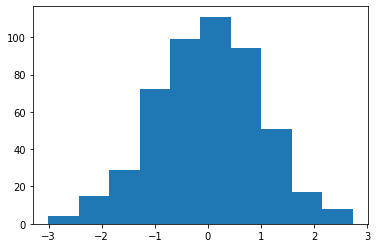

In [160]:
plt.hist(z_group["Age"])

In [161]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [162]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,166.804007,59.112901,37.322058,18479.703295
1,155.776681,80.348638,48.058395,19540.217722
2,135.687605,40.163796,19.084108,20085.354380
3,186.693759,59.443447,30.124853,19071.254341
4,155.881569,98.230917,34.037907,19062.009257
...,...,...,...,...
495,182.833879,3.462761,62.882954,21026.843517
496,89.407098,58.660913,36.363020,18898.518293
497,191.195269,50.343440,38.098379,21155.929414
498,89.600419,42.680898,40.536927,18131.271636


## Operaciones diversas muy útiles

In [163]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,166.804007,59.112901,37.322058,18479.703295
2,Male,Rich,135.687605,40.163796,19.084108,20085.354380
5,Male,Poor,176.352323,50.325117,1.459394,19448.821974
7,Female,Rich,171.331760,52.748110,41.595709,18869.794537
8,Male,Middle Class,161.440085,76.598448,18.960791,19117.523237
30,Female,Middle Class,148.732551,87.428975,32.774006,21242.814003


In [164]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
491,Male,Middle Class,142.710955,54.766100,24.908304,20076.028918
492,Female,Middle Class,135.617267,53.615845,57.641346,19790.519611
495,Male,Rich,182.833879,3.462761,62.882954,21026.843517
496,Female,Poor,89.407098,58.660913,36.363020,18898.518293
497,Female,Rich,191.195269,50.343440,38.098379,21155.929414
499,Male,Poor,212.222116,119.605441,31.710433,18619.657768


In [165]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     194.540507   45.688593  24.176502  19825.786107
       Poor             129.355192  114.709856  32.787448  19868.856499
       Rich             176.500192   88.693127  18.765395  19436.174179
Male   Middle Class     102.716330   77.666727  54.417503  18248.541984
       Poor             170.551029   53.614237  15.997468  21425.444754
       Rich             195.268574   59.413978  26.309024  20291.297142

In [166]:
double_group.nth(82)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     115.477364  129.193727  31.431077  19074.056617
       Poor             165.216717   88.377419  36.218838  20538.109179

In [167]:
data_sorted = data.sort_values(["Age", "Income"])

In [168]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
51,Male,Poor,175.339770,47.293390,-10.160034,18374.234334
456,Female,Rich,203.669138,65.337512,-7.212099,19657.720982
72,Female,Rich,144.193571,67.569464,-4.085489,20263.340536
319,Male,Middle Class,197.493502,86.716163,-3.294550,20408.253051
115,Male,Poor,126.954324,47.453429,-0.319632,21250.717792
314,Female,Poor,131.630613,56.550679,-0.077664,20773.481263
203,Male,Poor,111.092446,51.468274,1.070041,21017.345256
79,Male,Poor,136.255775,45.800384,1.314991,19380.604215
205,Male,Rich,147.641171,34.531730,1.357078,19538.330294
5,Male,Poor,176.352323,50.325117,1.459394,19448.821974


In [169]:
age_grouped = data_sorted.groupby("Gender")

In [170]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
51,Male,Poor,175.339770,47.293390,-10.160034,18374.234334
456,Female,Rich,203.669138,65.337512,-7.212099,19657.720982


In [171]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
495,Male,Rich,182.833879,3.462761,62.882954,21026.843517
404,Female,Middle Class,192.926190,47.128583,67.282584,20711.233761


# Conjunto de entrenamiento y conjunto de testing

In [172]:
import pandas as pd

In [173]:
data = pd.read_csv("/content/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [174]:
len(data)

3333

## Dividir utilizando la distribución normal

In [175]:
a = np.random.randn(len(data))

(array([  3.,  14.,  87., 342., 722., 984., 753., 317.,  97.,  14.]),
 array([-3.9760411 , -3.24755429, -2.51906748, -1.79058066, -1.06209385,
        -0.33360704,  0.39487978,  1.12336659,  1.8518534 ,  2.58034022,
         3.30882703]),
 <a list of 10 Patch objects>)

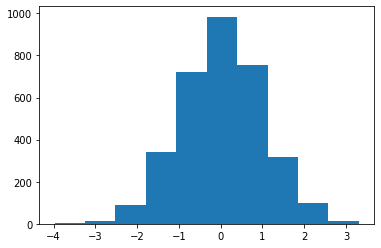

In [176]:
plt.hist(a)

In [177]:
check = (a<0.75)

In [178]:
check

array([ True,  True, False, ...,  True, False,  True])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3333 Lists of Patches objects>)

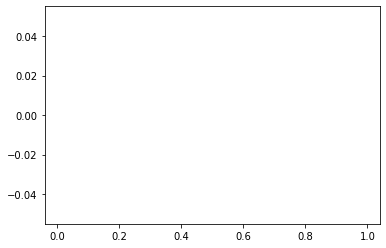

In [179]:
plt.hist(np.bitwise_xor(check[True],check[False]))

In [180]:
training = data[check]
testing = data[~check]

In [181]:
len(training)

2562

In [182]:
len(testing)

771

## Con la libreria sklearn

In [183]:

from sklearn.model_selection import train_test_split

In [184]:
train, test = train_test_split(data, test_size = 0.2)

In [185]:
len(train)

2666

In [186]:
len(test)

667

## Usando una función de shuffle

In [187]:
import numpy as np

In [188]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [189]:
import sklearn

In [190]:
data = sklearn.utils.shuffle(data)

In [191]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [192]:
len(train_data)

2499

In [193]:
len(test_data)

833